In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import pickle
from feedforward import feedforward, geo_mean_overflow

import warnings
warnings.filterwarnings('ignore')

In [11]:
MIDIS_PATH = 'gwern/midis/Big_Data_Set/'
TEST_SET_LENGTH = 15

def calc_perplexity(model_path, model_dict_path, test_path, test_set_size):
    result = feedforward(model_path, model_dict_path, 'gwern/midis/Big_Data_Set/', test_set_size)
    return geo_mean_overflow(result)

In [12]:
runs = [
    ("model_bigdataset_100_relu", "bigdataset_100_dict.pickle"),
    ("model_bigdataset_100_tanh", "bigdataset_100_dict.pickle"),
    ("model_bigdataset_100_sigmoid", "bigdataset_100_dict.pickle"),
    ("model_bigdataset_1000_relu", "bigdataset_1000_dict.pickle"),
    ("model_bigdataset_1000_tanh", "bigdataset_1000_dict.pickle"),
    ("model_bigdataset_1000_sigmoid", "bigdataset_1000_dict.pickle"),   
    ("model_bigdataset_5000_relu", "bigdataset_5000_dict.pickle"),
    ("model_bigdataset_5000_tanh", "bigdataset_5000_dict.pickle"),
    ("model_bigdataset_5000_sigmoid", "bigdataset_5000_dict.pickle"),   
    ("model_bigdataset_10000_relu", "bigdataset_10000_dict.pickle"),
    ("model_bigdataset_10000_tanh", "bigdataset_10000_dict.pickle"),
    ("model_bigdataset_10000_sigmoid", "bigdataset_10000_dict.pickle"),   
    ("model_bigdataset_20000_relu", "bigdataset_20000_dict.pickle"),
    ("model_bigdataset_20000_tanh", "bigdataset_20000_dict.pickle"),
    ("model_bigdataset_20000_sigmoid", "bigdataset_20000_dict.pickle"),   
]

In [9]:
# calc_perplexity("model_bigdataset_20000_relu", "bigdataset_20000_dict.pickle", 'gwern/midis/Big_Data_Set/', 512)

In [14]:
results = {}
for model, dict_notes in runs:
    results[model] = calc_perplexity(model, dict_notes, MIDIS_PATH, TEST_SET_LENGTH)
    
print(list(results.items()))

model_path: model_bigdataset_100_relu
39712
reading midi: gwern/midis/Big_Data_Set/B/B/Bay_City_Rollers_-_I_Only_Want_To_Be_With_You.midreading midi: gwern/midis/Big_Data_Set/B/B/Buck_O'Nine_-_My_Town.midreading midi: gwern/midis/Big_Data_Set/B/B/BEEGEES.Islands in the stream K.midreading midi: gwern/midis/Big_Data_Set/B/B/building_people_of_power.midreading midi: gwern/midis/Big_Data_Set/B/B/BjornAkesson_-_Gunsmoke__vector909n_20121224054727.midreading midi: gwern/midis/Big_Data_Set/B/B/bob_marley-get_up_stand_up.midreading midi: gwern/midis/Big_Data_Set/B/B/beach_boys-god_only_knows.midreading midi: gwern/midis/Big_Data_Set/B/B/Bingo_Players_-_Mode__Frozen_Ray_20111213090642.midreading midi: gwern/midis/Big_Data_Set/B/B/BellsAreRinging.midreading midi: gwern/midis/Big_Data_Set/B/B/BACHARACH.Magic moments.midreading midi: gwern/midis/Big_Data_Set/B/B/BadMoonRising2-CCR.midreading midi: gwern/midis/Big_Data_Set/B/B/Billy_Ocean_-_Suddenly.midreading midi: gwern/midis/Big_Data_Set/B/B/BE

In [17]:
results = [('model_bigdataset_100_relu', 5.2307429769385285), ('model_bigdataset_100_tanh', 5.288916501416681), ('model_bigdataset_100_sigmoid', 9.19578669457774), ('model_bigdataset_1000_relu', 43.5975204687343), ('model_bigdataset_1000_tanh', 106.87271895757775), ('model_bigdataset_1000_sigmoid', 70.77649210402089), ('model_bigdataset_5000_relu', 1.0), ('model_bigdataset_5000_tanh', 1.0), ('model_bigdataset_5000_sigmoid', 1.0), ('model_bigdataset_10000_relu', 1.0), ('model_bigdataset_10000_tanh', 1.0), ('model_bigdataset_10000_sigmoid', 1.0), ('model_bigdataset_20000_relu', 1.0), ('model_bigdataset_20000_tanh', 1.0), ('model_bigdataset_20000_sigmoid', 1.0)]
results

[('model_bigdataset_100_relu', 5.2307429769385285),
 ('model_bigdataset_100_tanh', 5.288916501416681),
 ('model_bigdataset_100_sigmoid', 9.19578669457774),
 ('model_bigdataset_1000_relu', 43.5975204687343),
 ('model_bigdataset_1000_tanh', 106.87271895757775),
 ('model_bigdataset_1000_sigmoid', 70.77649210402089),
 ('model_bigdataset_5000_relu', 1.0),
 ('model_bigdataset_5000_tanh', 1.0),
 ('model_bigdataset_5000_sigmoid', 1.0),
 ('model_bigdataset_10000_relu', 1.0),
 ('model_bigdataset_10000_tanh', 1.0),
 ('model_bigdataset_10000_sigmoid', 1.0),
 ('model_bigdataset_20000_relu', 1.0),
 ('model_bigdataset_20000_tanh', 1.0),
 ('model_bigdataset_20000_sigmoid', 1.0)]

In [19]:
from collections import defaultdict

results_by_model = defaultdict(lambda: {})
for model, perplexity in results:
    name = model.split('_')[-2]
    activation_f = model.split('_')[-1]
    results_by_model[name][activation_f] =  perplexity
    
df = pd.DataFrame(results_by_model)
df

,100,1000,5000,10000,20000
relu,5.230743,43.597520,1.0,1.0,1.0
tanh,5.288917,106.872719,1.0,1.0,1.0
sigmoid,9.195787,70.776492,1.0,1.0,1.0


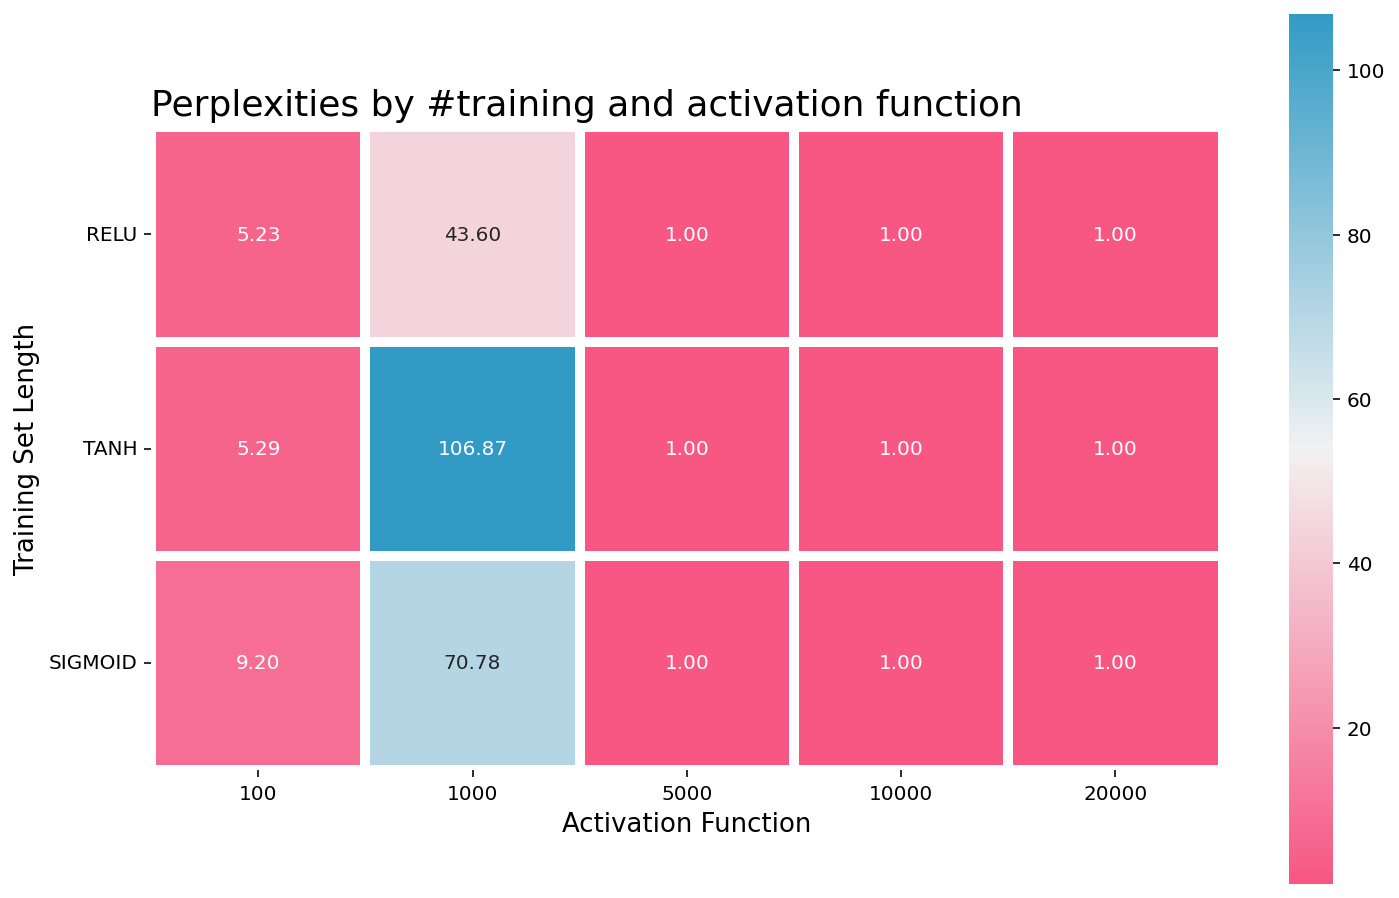

In [20]:
fig, ax = plt.subplots(figsize=(12, 10))
cmap = sb.diverging_palette(0, 230, 90, 60, as_cmap=True)

sb.heatmap(df, annot=True, fmt=".2f", linewidths=5, cmap=cmap, cbar_kws={"shrink": .8}, square=True)
yticks = [i.upper() for i in df.index]
xticks = [i.upper() for i in df.columns]
plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)
plt.xticks(plt.xticks()[0], labels=xticks)
title = 'Perplexities by #training and activation function'
plt.title(title, loc='left', fontsize=18)
plt.ylabel('Training Set Length', fontsize = 13)
plt.xlabel('Activation Function', fontsize = 13)
plt.show()